In [1]:
 #accessing netcdf files from Hector's folders
import os, glob, sys
sys.path.append("//nobackup//amondal//Python//Hector_Python_Scripts")
sys.path.append("//nobackup/amondal//Python//mit_geos_analysis")
#from mds_store import openmdsdataset
#playing with netcdf - xarray
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
# How about visualization?
%matplotlib inline
import netCDF4
from netCDF4 import Dataset
#from xmitgcm import open_mdsdataset
from GetNCDataSet import *
from MITllc2160Depth import *
sys.path.append("//nobackup/amondal//Python//xmitgcm//xmitgcm")
from xmitgcm.mds_store import open_mdsdataset
import xrft
import xgcm
from spectral_analysis_code import *
from GetNCDataSet import getGEOSNCDataSet

from dask.distributed import Client
client = Client(memory_limit='100GB',n_workers = 40, threads_per_worker=1)

In [47]:
def coriolis(lat):
    omg = 1 / 24.0
    return 2*omg*np.sin((lat*3.14159)/180)

In [4]:
#depthToZlayer(25)
zlayerToDepth(25)

154.99

In [53]:
T15c = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month_bigger_region/', 'Theta', 15,15).compute()
T15c

Time combined dataset has been opened.
I concatenated the first Z-layer


<xarray.Dataset>
Dimensions:  (lat: 500, lon: 500, time: 4416)
Coordinates:
  * lat      (lat) float64 23.0 23.04 23.08 23.12 ... 42.84 42.88 42.92 42.96
  * lon      (lon) float64 -67.0 -66.96 -66.92 -66.88 ... -47.12 -47.08 -47.04
  * time     (time) datetime64[ns] 2020-03-01 ... 2020-08-31T23:00:00
Data variables:
    Theta    (time, lat, lon) float64 24.49 24.47 24.48 ... 16.58 16.59 16.37

In [54]:
T15cr = regularizeCoordinatesDateTime(T15c.Theta[0:2208], interp='linear')

In [55]:
T15cr

<xarray.DataArray (time: 2208, xdim: 500, ydim: 500)>
array([[[24.49345398, 24.47172165, 24.47724724, ..., 23.04829597,
         23.02067947, 23.01810646],
        [24.43882942, 24.46162224, 24.47492981, ..., 23.03767776,
         23.01778221, 23.01219177],
        [24.4440403 , 24.45858765, 24.41941452, ..., 23.03289795,
         23.01490021, 23.01616669],
        ...,
        [ 8.87749481,  9.13347054,  9.22055817, ..., 11.52486134,
         11.31529713, 11.74188042],
        [ 8.87330723,  9.10377979,  9.14779186, ..., 11.22697735,
         11.10668373, 11.84329891],
        [ 8.83899784,  9.00710964,  9.0097208 , ..., 10.90013885,
         11.18617916, 12.03863811]],

       [[24.50201607, 24.47426796, 24.47546959, ..., 23.04316902,
         23.01650047, 23.01461029],
        [24.4357872 , 24.45846939, 24.47412491, ..., 23.03305626,
         23.01395798, 23.00987816],
        [24.44111061, 24.45793152, 24.42865944, ..., 23.02833748,
         23.01122093, 23.01442528],
...
        [10.01981354, 10.13425064, 10.36848259, ..., 15.70125771,
         15.60155773, 15.61035252],
        [10.22014427, 10.28159618, 10.52082443, ..., 15.70038795,
         15.61218548, 15.64349365],
        [10.50225353, 10.43549824, 10.46339417, ..., 15.7128191 ,
         15.68715763, 15.67277431]],

       [[23.81716156, 23.80105782, 23.80335999, ..., 23.6571312 ,
         23.62116814, 23.52261734],
        [23.61273766, 23.6628437 , 23.73420906, ..., 23.67942429,
         23.65599251, 23.56116486],
        [23.54044151, 23.61400223, 23.69168854, ..., 23.66877937,
         23.66655922, 23.61610794],
        ...,
        [10.09227276, 10.15011692, 10.34631729, ..., 15.71622276,
         15.58439922, 15.62137032],
        [10.30836391, 10.29531097, 10.49538517, ..., 15.69288921,
         15.61530972, 15.66637325],
        [10.5556612 , 10.47521782, 10.446455  , ..., 15.6842308 ,
         15.667202  , 15.6506424 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-03-01 ... 2020-05-31T23:00:00
  * xdim     (xdim) float64 0.0 1.738 3.476 5.214 ... 862.0 863.8 865.5 867.2
  * ydim     (ydim) float64 0.0 4.448 8.896 ... 2.211e+03 2.215e+03 2.22e+03

In [56]:
dThetady = T15cr.differentiate('xdim') 

In [57]:
dThetadx = T15cr.differentiate('ydim')

In [58]:
Theta_grad = np.sqrt(dThetady**2 + dThetadx**2)
Theta_grad = Theta_grad.rename('$\Theta$ gradient magnitude (45m) (Celsius/km)')

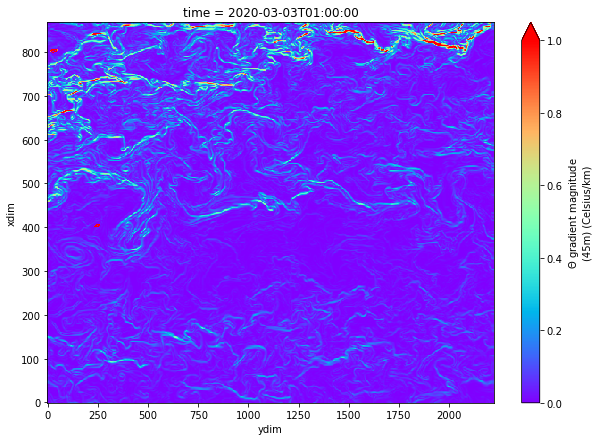

In [59]:
%matplotlib inline
Theta_grad[49].plot(vmin=0, vmax=1, cmap='rainbow', figsize=(10,7))

In [60]:
dThetady_np = dThetady.values
dThetady_swap = np.swapaxes(np.swapaxes(dThetady_np, 0, 1), 1, 2)
dThetadx_np = dThetadx.values
dThetadx_swap = np.swapaxes(np.swapaxes(dThetadx_np, 0, 1), 1, 2)

In [61]:
dThetady_swap.shape

(500, 500, 2208)

In [62]:
dx = dThetady.xdim.diff('xdim').mean().values
dy = dThetady.ydim.diff('ydim').mean().values
dt = 1

In [63]:
dy

array(4.44795694)

In [64]:
dt

1

In [65]:
# detrend: space and time
from scipy import signal
u = dThetady_swap
v = dThetadx_swap
u = signal.detrend(u,axis=0,type='linear')
u = signal.detrend(u,axis=1,type='linear')
u = signal.detrend(u,axis=2,type='linear')
v = signal.detrend(v,axis=0,type='linear')
v = signal.detrend(v,axis=1,type='linear')
v = signal.detrend(v,axis=2,type='linear')
print('------- End detrending --------')

------- End detrending --------


In [66]:
2208/30

73.6

In [67]:
# Preambule
import wf_spectrum
iy,ix,it = u.shape
#print(it,iy,ix)
iaux = (30*24)#(60*24*7)/10 #(7*24)
dr = max(dx,dy)
nt = np.around(int(it/(iaux)),decimals=1)
print(nt)

# Calclate the 3D spectrum
for i in range(int(nt)):
      uaux = u[:,:,i*iaux:i*iaux+iaux]
      vaux = v[:,:,i*iaux:i*iaux+iaux]
      if i == 0:
         Eu,k,l,om = wf_spectrum.spec_est3(uaux,dr,dr,dt)
         Ev,k,l,om = wf_spectrum.spec_est3(vaux,dr,dr,dt)
      else:
         Eua,_,_,_ = wf_spectrum.spec_est3(uaux,dr,dr,dt)
         Eva,_,_,_ = wf_spectrum.spec_est3(vaux,dr,dr,dt)
         Eu = Eu + Eua
         Ev = Ev + Eva   
Eu = Eu/nt
Ev = Ev/nt
E = Eu + Ev
#USE SAME RESOLUTION IN THE DX AND DY!!!

3


In [68]:
def calc_ispec(k,l,E):
    """ calculates isotropic spectrum from 2D spectrum """

    dk,dl = k[1,]-k[0],l[1]-l[0]
    l,k = np.meshgrid(l,k)
    wv = np.sqrt(k**2 + l**2)

    if k.max()>l.max():
        kmax = l.max()
    else:
        kmax = k.max()

    # create radial wavenumber
    dkr = np.sqrt(dk**2 + dl**2)
    kr =  np.arange(dkr/2.,kmax+dkr,dkr)
    ispec = np.zeros(kr.size)
    #print(ispec.shape)
    #print(kr.shape)
    for i in range(kr.size):
        fkr =  (wv>=kr[i]-dkr/2) & (wv<=kr[i]+dkr/2)
    #    print(fkr.shape)
        dth = np.pi / (fkr.sum()-1)
        ispec[i] = E[fkr].sum() * kr[i] * dth

    return kr, ispec

In [69]:
I = 0
for i in range(om.size-1):
    kiso,Ei = calc_ispec(k,l,E[:,:,i])
    if I == 0:
        Eiso = np.empty((len(Ei),om.size))
    Eiso[:,i] = Ei
    I = I + 1

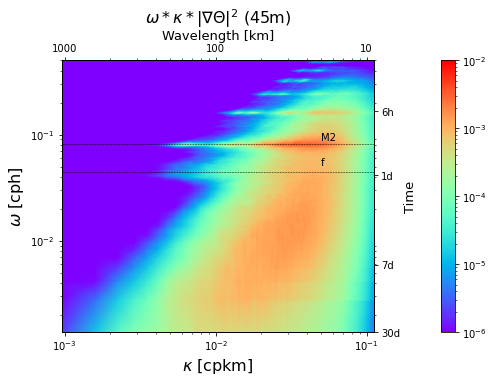

In [70]:
#====================================================
#===================================================
kk = kiso[1:]
omm = om[1:]
ff = coriolis(32)
omg_m2 = 1/12.4
omg_f = 1/24.0
omg_k1 = 1 / 23.93

from matplotlib.colors import LogNorm
#################
fig = plt.figure(figsize=(8,5))


#fig = plt.figure(figsize=(10,6))
#ax1 = plt.subplot2grid((3,6),(0,1),colspan=2)
#ax2 = plt.subplot2grid((3,6),(1,0),rowspan=2)
#ax3 = plt.subplot2grid((3,6),(1,1),rowspan=2, colspan=2)
ax1 = fig.add_subplot(111)
cs=plt.pcolormesh(kk,omm,60*1*Eiso.T[1:,1:]*kk[None,...]*omm[...,None],
                   shading='gouraud',cmap='rainbow',norm=LogNorm() )

ax1.set_yscale('log')
ax1.set_xscale('log')
plt.title(r'$\omega * \kappa * | \nabla \Theta |^2$ (45m)', size=16)
plt.xlabel(r'$\kappa$ [cpkm]',size=16)
plt.ylabel(r'$\omega$ [cph]',size=16)
plt.clim([1e-6,1e-2])
plt.colorbar(pad=0.15)
#ax1.set_ylim([omm[1], omm[-1]])
#ax1.set_xlim([kk[1],1e-1])
#ax3.set_yticks([])
#plt.title('Mode-1',fontweight='bold',size=20)
#

#plt.savefig(PrntOut+figurename+output_format,format='png',
#            dpi=500,bbox_inches='tight')
ax1a = ax1.twiny()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_xlim(kk[0],kk[-1])
ax1a.set_xticks([1/1000, 1/100.,1/10.])
ax1a.set_xticklabels(['1000', '100','10'])
ax1a.set_xlabel('Wavelength [km]',size=13)
ax1a = ax1.twinx()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_ylim(1/(24.*30.),1/2.)
ax1a.set_yticks([1/6, 1/24.,1/(24.*7.),1/(24*30.)])
ax1a.set_yticklabels(['6h','1d','7d','30d'])
ax1a.set_ylabel('Time', size=13)
ks = np.array([kk[0],kk[-1]])
ax1.plot(ks,[omg_m2, omg_m2], 'k--', linewidth=.5)
ax1.text(0.05, omg_m2+0.0075, 'M2', color='k')
ax1.plot(ks,[ff,ff], 'k--', linewidth=.5)
ax1.text(0.05, ff+0.0075, 'f', color='k')
plt.show()


In [71]:
T28c = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month_bigger_region/', 'Theta', 28,28).compute()
T28c

Time combined dataset has been opened.
I concatenated the first Z-layer


<xarray.Dataset>
Dimensions:  (lat: 500, lon: 500, time: 4416)
Coordinates:
  * lat      (lat) float64 23.0 23.04 23.08 23.12 ... 42.84 42.88 42.92 42.96
  * lon      (lon) float64 -67.0 -66.96 -66.92 -66.88 ... -47.12 -47.08 -47.04
  * time     (time) datetime64[ns] 2020-03-01 ... 2020-08-31T23:00:00
Data variables:
    Theta    (time, lat, lon) float64 20.69 20.67 20.54 ... 14.54 14.53 14.49

In [72]:
T28cr = regularizeCoordinatesDateTime(T28c.Theta[0:2208], interp='linear')

In [73]:
dThetady = T28cr.differentiate('xdim') 

In [74]:
dThetadx = T28cr.differentiate('ydim')

In [75]:
Theta_grad = np.sqrt(dThetady**2 + dThetadx**2)
Theta_grad = Theta_grad.rename('$\Theta$ gradient magnitude (200m) (Celsius/km)')

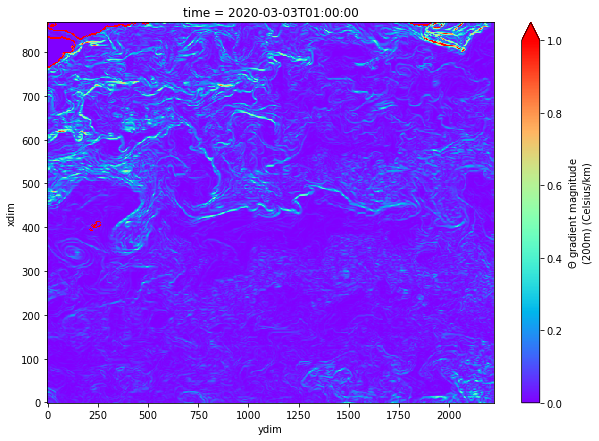

In [76]:
%matplotlib inline
Theta_grad[49].plot(vmin=0, vmax=1, cmap='rainbow', figsize=(10,7))

In [77]:
dThetady_np = dThetady.values
dThetady_swap = np.swapaxes(np.swapaxes(dThetady_np, 0, 1), 1, 2)
dThetadx_np = dThetadx.values
dThetadx_swap = np.swapaxes(np.swapaxes(dThetadx_np, 0, 1), 1, 2)

In [78]:
dThetady_swap.shape

(500, 500, 2208)

In [79]:
dx = dThetady.xdim.diff('xdim').mean().values
dy = dThetady.ydim.diff('ydim').mean().values
dt = 1

In [80]:
dy

array(4.44795694)

In [81]:
dt

1

In [82]:
# detrend: space and time
from scipy import signal
u = dThetady_swap
v = dThetadx_swap
u = signal.detrend(u,axis=0,type='linear')
u = signal.detrend(u,axis=1,type='linear')
u = signal.detrend(u,axis=2,type='linear')
v = signal.detrend(v,axis=0,type='linear')
v = signal.detrend(v,axis=1,type='linear')
v = signal.detrend(v,axis=2,type='linear')
print('------- End detrending --------')

------- End detrending --------


In [83]:
2208/30

73.6

In [84]:
# Preambule
import wf_spectrum
iy,ix,it = u.shape
#print(it,iy,ix)
iaux = (30*24)#(60*24*7)/10 #(7*24)
nt = np.around(int(it/(iaux)),decimals=1)
print(nt)

# Calclate the 3D spectrum
for i in range(int(nt)):
      uaux = u[:,:,i*iaux:i*iaux+iaux]
      vaux = v[:,:,i*iaux:i*iaux+iaux]
      if i == 0:
         Eu,k,l,om = wf_spectrum.spec_est3(uaux,dy,dy,dt)
         Ev,k,l,om = wf_spectrum.spec_est3(vaux,dy,dy,dt)
      else:
         Eua,_,_,_ = wf_spectrum.spec_est3(uaux,dy,dy,dt)
         Eva,_,_,_ = wf_spectrum.spec_est3(vaux,dy,dy,dt)
         Eu = Eu + Eua
         Ev = Ev + Eva   
Eu = Eu/nt
Ev = Ev/nt
E = Eu + Ev
#USE SAME RESOLUTION IN THE DX AND DY!!!

3


In [85]:
def calc_ispec(k,l,E):
    """ calculates isotropic spectrum from 2D spectrum """

    dk,dl = k[1,]-k[0],l[1]-l[0]
    l,k = np.meshgrid(l,k)
    wv = np.sqrt(k**2 + l**2)

    if k.max()>l.max():
        kmax = l.max()
    else:
        kmax = k.max()

    # create radial wavenumber
    dkr = np.sqrt(dk**2 + dl**2)
    kr =  np.arange(dkr/2.,kmax+dkr,dkr)
    ispec = np.zeros(kr.size)
    #print(ispec.shape)
    #print(kr.shape)
    for i in range(kr.size):
        fkr =  (wv>=kr[i]-dkr/2) & (wv<=kr[i]+dkr/2)
    #    print(fkr.shape)
        dth = np.pi / (fkr.sum()-1)
        ispec[i] = E[fkr].sum() * kr[i] * dth

    return kr, ispec

In [86]:
I = 0
for i in range(om.size-1):
    kiso,Ei = calc_ispec(k,l,E[:,:,i])
    if I == 0:
        Eiso = np.empty((len(Ei),om.size))
    Eiso[:,i] = Ei
    I = I + 1

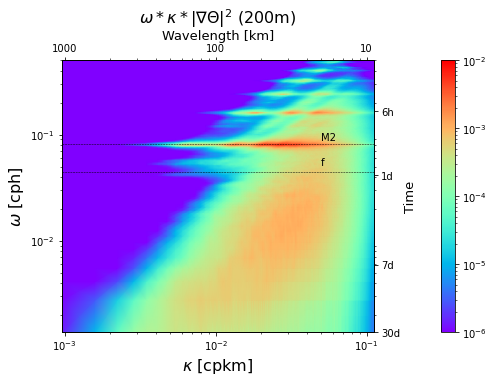

In [87]:
#====================================================
#===================================================
kk = kiso[1:]
omm = om[1:]
ff = coriolis(32)
omg_m2 = 1/12.4
omg_f = 1/24.0
omg_k1 = 1 / 23.93

from matplotlib.colors import LogNorm
#################
fig = plt.figure(figsize=(8,5))


#fig = plt.figure(figsize=(10,6))
#ax1 = plt.subplot2grid((3,6),(0,1),colspan=2)
#ax2 = plt.subplot2grid((3,6),(1,0),rowspan=2)
#ax3 = plt.subplot2grid((3,6),(1,1),rowspan=2, colspan=2)
ax1 = fig.add_subplot(111)
cs=plt.pcolormesh(kk,omm,60*1*Eiso.T[1:,1:]*kk[None,...]*omm[...,None],
                   shading='gouraud',cmap='rainbow',norm=LogNorm() )

ax1.set_yscale('log')
ax1.set_xscale('log')
plt.title(r'$\omega * \kappa * | \nabla \Theta |^2$ (200m)', size=16)
plt.xlabel(r'$\kappa$ [cpkm]',size=16)
plt.ylabel(r'$\omega$ [cph]',size=16)
plt.clim([1e-6,1e-2])
plt.colorbar(pad=0.15)
#ax1.set_ylim([omm[1], omm[-1]])
#ax1.set_xlim([kk[1],1e-1])
#ax3.set_yticks([])
#plt.title('Mode-1',fontweight='bold',size=20)
#

#plt.savefig(PrntOut+figurename+output_format,format='png',
#            dpi=500,bbox_inches='tight')
ax1a = ax1.twiny()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_xlim(kk[0],kk[-1])
ax1a.set_xticks([1/1000, 1/100.,1/10.])
ax1a.set_xticklabels(['1000', '100','10'])
ax1a.set_xlabel('Wavelength [km]',size=13)
ax1a = ax1.twinx()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_ylim(1/(24.*30.),1/2.)
ax1a.set_yticks([1/6, 1/24.,1/(24.*7.),1/(24*30.)])
ax1a.set_yticklabels(['6h','1d','7d','30d'])
ax1a.set_ylabel('Time', size=13)
ks = np.array([kk[0],kk[-1]])
ax1.plot(ks,[omg_m2, omg_m2], 'k--', linewidth=.5)
ax1.text(0.05, omg_m2+0.0075, 'M2', color='k')
ax1.plot(ks,[ff,ff], 'k--', linewidth=.5)
ax1.text(0.05, ff+0.0075, 'f', color='k')
plt.show()


In [88]:
T32c = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month_bigger_region/', 'Theta', 32,32).compute()
T32c

Time combined dataset has been opened.
I concatenated the first Z-layer


<xarray.Dataset>
Dimensions:  (lat: 500, lon: 500, time: 4416)
Coordinates:
  * lat      (lat) float64 23.0 23.04 23.08 23.12 ... 42.84 42.88 42.92 42.96
  * lon      (lon) float64 -67.0 -66.96 -66.92 -66.88 ... -47.12 -47.08 -47.04
  * time     (time) datetime64[ns] 2020-03-01 ... 2020-08-31T23:00:00
Data variables:
    Theta    (time, lat, lon) float64 19.13 19.12 19.16 ... 14.29 14.32 14.34

In [89]:
T32cr = regularizeCoordinatesDateTime(T32c.Theta[0:2208], interp='linear')

In [90]:
dThetady = T32cr.differentiate('xdim') 

In [91]:
dThetadx = T32cr.differentiate('ydim')

In [92]:
Theta_grad = np.sqrt(dThetady**2 + dThetadx**2)
Theta_grad = Theta_grad.rename('$\Theta$ gradient magnitude (300m) (Celsius/km)')

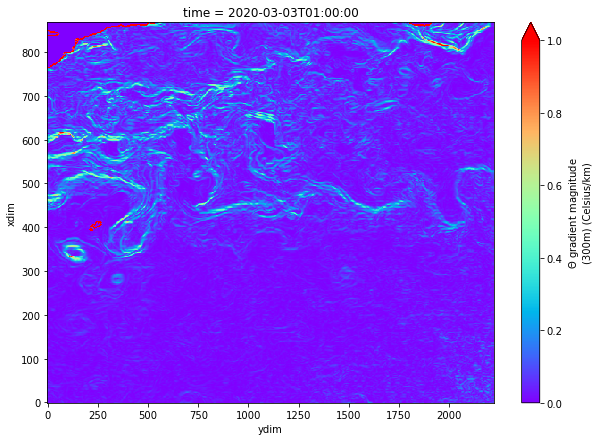

In [93]:
%matplotlib inline
Theta_grad[49].plot(vmin=0, vmax=1, cmap='rainbow', figsize=(10,7))

In [94]:
dThetady_np = dThetady.values
dThetady_swap = np.swapaxes(np.swapaxes(dThetady_np, 0, 1), 1, 2)
dThetadx_np = dThetadx.values
dThetadx_swap = np.swapaxes(np.swapaxes(dThetadx_np, 0, 1), 1, 2)

In [95]:
dThetady_swap.shape

(500, 500, 2208)

In [96]:
dx = dThetady.xdim.diff('xdim').mean().values
dy = dThetady.ydim.diff('ydim').mean().values
dt = 1

In [97]:
dy

array(4.44795694)

In [98]:
dt

1

In [99]:
# detrend: space and time
from scipy import signal
u = dThetady_swap
v = dThetadx_swap
u = signal.detrend(u,axis=0,type='linear')
u = signal.detrend(u,axis=1,type='linear')
u = signal.detrend(u,axis=2,type='linear')
v = signal.detrend(v,axis=0,type='linear')
v = signal.detrend(v,axis=1,type='linear')
v = signal.detrend(v,axis=2,type='linear')
print('------- End detrending --------')

------- End detrending --------


In [100]:
2208/30

73.6

In [101]:
# Preambule
import wf_spectrum
iy,ix,it = u.shape
#print(it,iy,ix)
dr = max(dx,dy)
iaux = (30*24)#(60*24*7)/10 #(7*24)
nt = np.around(int(it/(iaux)),decimals=1)
print(nt)

# Calclate the 3D spectrum
for i in range(int(nt)):
      uaux = u[:,:,i*iaux:i*iaux+iaux]
      vaux = v[:,:,i*iaux:i*iaux+iaux]
      if i == 0:
         Eu,k,l,om = wf_spectrum.spec_est3(uaux,dr,dr,dt)
         Ev,k,l,om = wf_spectrum.spec_est3(vaux,dr,dr,dt)
      else:
         Eua,_,_,_ = wf_spectrum.spec_est3(uaux,dr,dr,dt)
         Eva,_,_,_ = wf_spectrum.spec_est3(vaux,dr,dr,dt)
         Eu = Eu + Eua
         Ev = Ev + Eva   
Eu = Eu/nt
Ev = Ev/nt
E = Eu + Ev
#USE SAME RESOLUTION IN THE DX AND DY!!!

3


In [102]:
def calc_ispec(k,l,E):
    """ calculates isotropic spectrum from 2D spectrum """

    dk,dl = k[1,]-k[0],l[1]-l[0]
    l,k = np.meshgrid(l,k)
    wv = np.sqrt(k**2 + l**2)

    if k.max()>l.max():
        kmax = l.max()
    else:
        kmax = k.max()

    # create radial wavenumber
    dkr = np.sqrt(dk**2 + dl**2)
    kr =  np.arange(dkr/2.,kmax+dkr,dkr)
    ispec = np.zeros(kr.size)
    #print(ispec.shape)
    #print(kr.shape)
    for i in range(kr.size):
        fkr =  (wv>=kr[i]-dkr/2) & (wv<=kr[i]+dkr/2)
    #    print(fkr.shape)
        dth = np.pi / (fkr.sum()-1)
        ispec[i] = E[fkr].sum() * kr[i] * dth

    return kr, ispec

In [103]:
I = 0
for i in range(om.size-1):
    kiso,Ei = calc_ispec(k,l,E[:,:,i])
    if I == 0:
        Eiso = np.empty((len(Ei),om.size))
    Eiso[:,i] = Ei
    I = I + 1

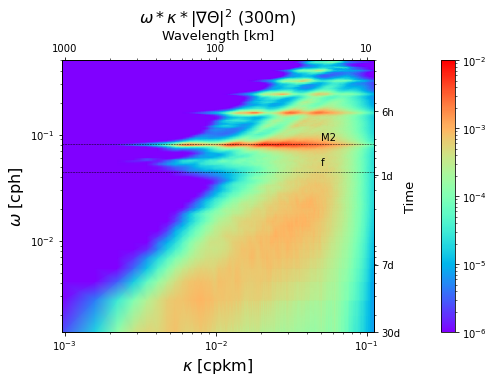

In [104]:
#====================================================
#===================================================
kk = kiso[1:]
omm = om[1:]
ff = coriolis(32)
omg_m2 = 1/12.4
omg_f = 1/24.0
omg_k1 = 1 / 23.93

from matplotlib.colors import LogNorm
#################
fig = plt.figure(figsize=(8,5))


#fig = plt.figure(figsize=(10,6))
#ax1 = plt.subplot2grid((3,6),(0,1),colspan=2)
#ax2 = plt.subplot2grid((3,6),(1,0),rowspan=2)
#ax3 = plt.subplot2grid((3,6),(1,1),rowspan=2, colspan=2)
ax1 = fig.add_subplot(111)
cs=plt.pcolormesh(kk,omm,60*1*Eiso.T[1:,1:]*kk[None,...]*omm[...,None],
                   shading='gouraud',cmap='rainbow',norm=LogNorm() )

ax1.set_yscale('log')
ax1.set_xscale('log')
plt.title(r'$\omega * \kappa * | \nabla \Theta |^2$ (300m)', size=16)
plt.xlabel(r'$\kappa$ [cpkm]',size=16)
plt.ylabel(r'$\omega$ [cph]',size=16)
plt.clim([1e-6,1e-2])
plt.colorbar(pad=0.15)
#ax1.set_ylim([omm[1], omm[-1]])
#ax1.set_xlim([kk[1],1e-1])
#ax3.set_yticks([])
#plt.title('Mode-1',fontweight='bold',size=20)
#

#plt.savefig(PrntOut+figurename+output_format,format='png',
#            dpi=500,bbox_inches='tight')
ax1a = ax1.twiny()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_xlim(kk[0],kk[-1])
ax1a.set_xticks([1/1000, 1/100.,1/10.])
ax1a.set_xticklabels(['1000', '100','10'])
ax1a.set_xlabel('Wavelength [km]',size=13)
ax1a = ax1.twinx()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_ylim(1/(24.*30.),1/2.)
ax1a.set_yticks([1/6, 1/24.,1/(24.*7.),1/(24*30.)])
ax1a.set_yticklabels(['6h','1d','7d','30d'])
ax1a.set_ylabel('Time', size=13)
ks = np.array([kk[0],kk[-1]])
ax1.plot(ks,[omg_m2, omg_m2], 'k--', linewidth=.5)
ax1.text(0.05, omg_m2+0.0075, 'M2', color='k')
ax1.plot(ks,[ff,ff], 'k--', linewidth=.5)
ax1.text(0.05, ff+0.0075, 'f', color='k')
plt.show()


In [105]:
T36c = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month_bigger_region/', 'Theta', 36,36).compute()


Time combined dataset has been opened.
I concatenated the first Z-layer


In [106]:
T36cr = regularizeCoordinatesDateTime(T36c.Theta[0:2208], interp='linear')

In [107]:
dThetady = T36cr.differentiate('xdim') 

In [108]:
dThetadx = T36cr.differentiate('ydim')

In [109]:
Theta_grad = np.sqrt(dThetady**2 + dThetadx**2)
Theta_grad = Theta_grad.rename('$\Theta$ gradient magnitude (400m) (Celsius/km)')

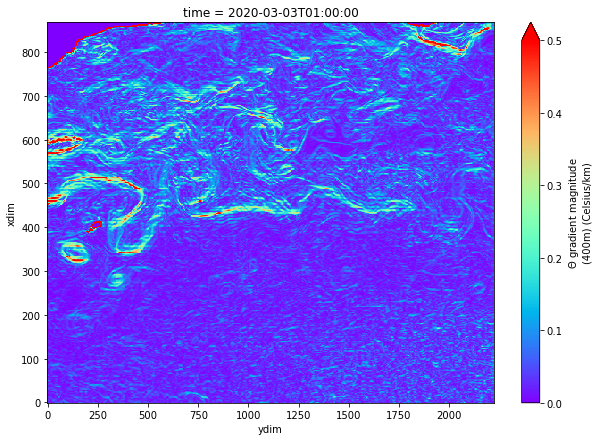

In [122]:
%matplotlib inline
Theta_grad[49].plot(vmin=0, vmax=.5, cmap='rainbow', figsize=(10,7))

In [111]:
dThetady_np = dThetady.values
dThetady_swap = np.swapaxes(np.swapaxes(dThetady_np, 0, 1), 1, 2)
dThetadx_np = dThetadx.values
dThetadx_swap = np.swapaxes(np.swapaxes(dThetadx_np, 0, 1), 1, 2)

In [112]:
dThetady_swap.shape

(500, 500, 2208)

In [113]:
dx = dThetady.xdim.diff('xdim').mean().values
dy = dThetady.ydim.diff('ydim').mean().values
dt = 1

In [114]:
dy

array(4.44795694)

In [115]:
dt

1

In [116]:
# detrend: space and time
from scipy import signal
u = dThetady_swap
v = dThetadx_swap
u = signal.detrend(u,axis=0,type='linear')
u = signal.detrend(u,axis=1,type='linear')
u = signal.detrend(u,axis=2,type='linear')
v = signal.detrend(v,axis=0,type='linear')
v = signal.detrend(v,axis=1,type='linear')
v = signal.detrend(v,axis=2,type='linear')
print('------- End detrending --------')

------- End detrending --------


In [117]:
2208/30

73.6

In [118]:
# Preambule
import wf_spectrum
iy,ix,it = u.shape
#print(it,iy,ix)
iaux = (30*24)#(60*24*7)/10 #(7*24)
nt = np.around(int(it/(iaux)),decimals=1)
print(nt)

# Calclate the 3D spectrum
for i in range(int(nt)):
      uaux = u[:,:,i*iaux:i*iaux+iaux]
      vaux = v[:,:,i*iaux:i*iaux+iaux]
      if i == 0:
         Eu,k,l,om = wf_spectrum.spec_est3(uaux,dy,dy,dt)
         Ev,k,l,om = wf_spectrum.spec_est3(vaux,dy,dy,dt)
      else:
         Eua,_,_,_ = wf_spectrum.spec_est3(uaux,dy,dy,dt)
         Eva,_,_,_ = wf_spectrum.spec_est3(vaux,dy,dy,dt)
         Eu = Eu + Eua
         Ev = Ev + Eva   
Eu = Eu/nt
Ev = Ev/nt
E = Eu + Ev
#USE SAME RESOLUTION IN THE DX AND DY!!!

3


In [119]:
def calc_ispec(k,l,E):
    """ calculates isotropic spectrum from 2D spectrum """

    dk,dl = k[1,]-k[0],l[1]-l[0]
    l,k = np.meshgrid(l,k)
    wv = np.sqrt(k**2 + l**2)

    if k.max()>l.max():
        kmax = l.max()
    else:
        kmax = k.max()

    # create radial wavenumber
    dkr = np.sqrt(dk**2 + dl**2)
    kr =  np.arange(dkr/2.,kmax+dkr,dkr)
    ispec = np.zeros(kr.size)
    #print(ispec.shape)
    #print(kr.shape)
    for i in range(kr.size):
        fkr =  (wv>=kr[i]-dkr/2) & (wv<=kr[i]+dkr/2)
    #    print(fkr.shape)
        dth = np.pi / (fkr.sum()-1)
        ispec[i] = E[fkr].sum() * kr[i] * dth

    return kr, ispec

In [120]:
I = 0
for i in range(om.size-1):
    kiso,Ei = calc_ispec(k,l,E[:,:,i])
    if I == 0:
        Eiso = np.empty((len(Ei),om.size))
    Eiso[:,i] = Ei
    I = I + 1

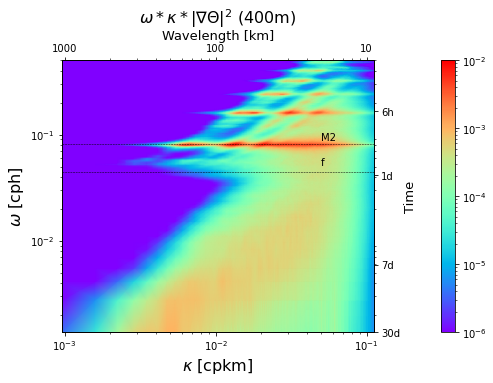

In [121]:
#====================================================
#===================================================
kk = kiso[1:]
omm = om[1:]
ff = coriolis(32)
omg_m2 = 1/12.4
omg_f = 1/24.0
omg_k1 = 1 / 23.93

from matplotlib.colors import LogNorm
#################
fig = plt.figure(figsize=(8,5))


#fig = plt.figure(figsize=(10,6))
#ax1 = plt.subplot2grid((3,6),(0,1),colspan=2)
#ax2 = plt.subplot2grid((3,6),(1,0),rowspan=2)
#ax3 = plt.subplot2grid((3,6),(1,1),rowspan=2, colspan=2)
ax1 = fig.add_subplot(111)
cs=plt.pcolormesh(kk,omm,60*1*Eiso.T[1:,1:]*kk[None,...]*omm[...,None],
                   shading='gouraud',cmap='rainbow',norm=LogNorm() )

ax1.set_yscale('log')
ax1.set_xscale('log')
plt.title(r'$\omega * \kappa * | \nabla \Theta |^2$ (400m)', size=16)
plt.xlabel(r'$\kappa$ [cpkm]',size=16)
plt.ylabel(r'$\omega$ [cph]',size=16)
plt.clim([1e-6,1e-2])
plt.colorbar(pad=0.15)
#ax1.set_ylim([omm[1], omm[-1]])
#ax1.set_xlim([kk[1],1e-1])
#ax3.set_yticks([])
#plt.title('Mode-1',fontweight='bold',size=20)
#

#plt.savefig(PrntOut+figurename+output_format,format='png',
#            dpi=500,bbox_inches='tight')
ax1a = ax1.twiny()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_xlim(kk[0],kk[-1])
ax1a.set_xticks([1/1000, 1/100.,1/10.])
ax1a.set_xticklabels(['1000', '100','10'])
ax1a.set_xlabel('Wavelength [km]',size=13)
ax1a = ax1.twinx()
ax1a.set_yscale('log')
ax1a.set_xscale('log')
ax1a.set_ylim(1/(24.*30.),1/2.)
ax1a.set_yticks([1/6, 1/24.,1/(24.*7.),1/(24*30.)])
ax1a.set_yticklabels(['6h','1d','7d','30d'])
ax1a.set_ylabel('Time', size=13)
ks = np.array([kk[0],kk[-1]])
ax1.plot(ks,[omg_m2, omg_m2], 'k--', linewidth=.5)
ax1.text(0.05, omg_m2+0.0075, 'M2', color='k')
ax1.plot(ks,[ff,ff], 'k--', linewidth=.5)
ax1.text(0.05, ff+0.0075, 'f', color='k')
plt.show()
